# Investigate a dataset

In the following project it will be analyzed the 'titanic_data.csv' dataset, containing informations on some passengers and members of the crew of the Titanic. 
The objective of the project is to see which factors made people more likely to survive.

In [1]:
# importing libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

In [2]:
# creating a dataframe from the csv file
titanic_df = pd.read_csv('titanic_data.csv')

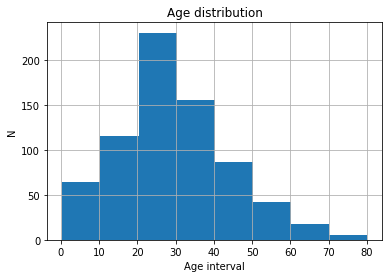

In [3]:
# analysis of the distribution of age between the people on Titanic
%matplotlib inline
titanic_df['Age'].hist(bins=8)
plt.title('Age distribution')
plt.xlabel('Age interval')
plt.ylabel('N')

This histogram shows the distribution of age between the people on the Titanic

## Survived people

It will be now analyzed the data about the survived people to discover which factors made the probability of survive higher

In [51]:
# calculation of percentage of overall survived
total_survived = titanic_df['Survived'].sum()     # total number of people survived
number_of_passenger = len(titanic_df)             # total number of people on the ship
perc_survived_overall = 100*total_survived/number_of_passenger        # percentage of survived
print ('The overall percentage of people survived is',perc_survived_overall)

The overall percentage of people survived is 38.38383838383838


In [45]:
# function to calculate the percentage of people survived by different key of the dataset
def survived_by_key(df,key):
    data_by_key = df.groupby(key)
    #print (data_by_class.head())
    surv_by_key = data_by_key['Survived'].sum()     # survived passenger by key
    pass_by_key = data_by_key['Survived'].size()    # total passenger by key
    perc_survived_by_key = 100*surv_by_key/pass_by_key      # percentage
    return perc_survived_by_key

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


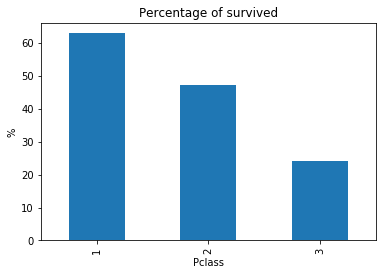

In [46]:
# Analysis of people survived by class
survived_by_class = survived_by_key(titanic_df,'Pclass')
print (survived_by_class)
survived_by_class.plot.bar()
plt.ylabel('%')
plt.title('Percentage of survived')

Graph showing the percentage of people survived by class. The suriving rate is higher for the first class, as easily predictable.

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


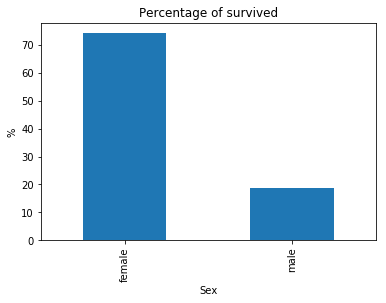

In [47]:
# Analysis of people survived by gender
survived_by_sex = survived_by_key(titanic_df,'Sex')
print (survived_by_sex)
survived_by_sex.plot.bar()
plt.ylabel('%')
plt.title('Percentage of survived')

Graph showing the percentage of people survived by gender

Sex        female       male
Pclass                      
1       96.808511  36.885246
2       92.105263  15.740741
3       50.000000  13.544669


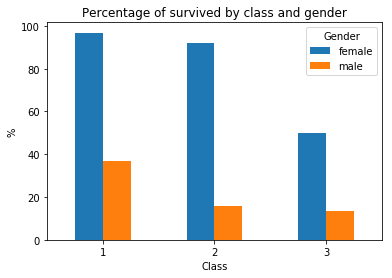

In [52]:
# Combined analysis by class and gender
survived_by_class_and_sex = survived_by_key(titanic_df,['Pclass','Sex']).unstack()
print (survived_by_class_and_sex1)
#%matplotlib inline
fig = survived_by_class_and_sex1.plot.bar()
fig.set(xlabel = 'Class', ylabel = '%',
        title = 'Percentage of survived by class and gender')
fig.set_xticklabels(fig.get_xmajorticklabels(), rotation = 0)
fig.legend(title='Gender')

Graph showing the percentage of people survived by class and gender. It can be seen that the trend doesn't change.

There are 177 blank age cells out of 891 total data

Age bin
0-15     59.036145
16-30    35.889571
31-45    42.574257
45+      36.893204
Name: Survived, dtype: float64


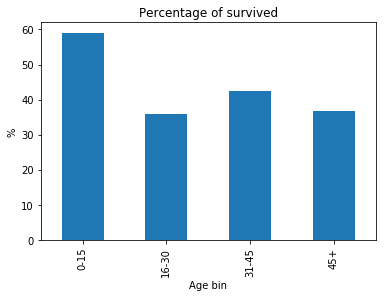

In [50]:
# Analysis by age
# Data has to be grouped in bins to be better analyzed
age_data = titanic_df['Age'].dropna()   # do not take into account the empty age cells
max_age = age_data.max()
n_age_missing = len(titanic_df) - len(age_data)  # number of missing age data

print ('There are',n_age_missing,'blank age cells out of', len(titanic_df),'total data')
print ('')

# binning age data in groups
age_data_binned = pd.cut(age_data,[0,15,30,45,max_age],labels=['0-15','16-30','31-45','45+'], retbins=False)
#creating DataFrame out of binned data
age_data_binned_df = pd.DataFrame(age_data_binned)
age_data_binned_df=age_data_binned_df.rename(columns = {'Age':'Age bin'}) #change the name of the column to avoid error when merging
#creating new dataframe with one more column 
new_df = titanic_df.join(age_data_binned_df)

#call the function to calculate percentage by age
survived_by_age = survived_by_key(new_df,['Age bin'])
print (survived_by_age)
survived_by_age.plot.bar()
plt.ylabel('%')
plt.title('Percentage of survived')

Graph showing the percentage of people survived by age. The data has been grouped in four bins in oredr to have a significant amount of data in every bin.

## Conclusions

It can be seen by the graphs that the higher is the class, the higher is the percentage of surviving. It sounds reasonable.
The graphs also show that the percentage of survived is definetly much higher between female and slightly higher between younger (under 15 years old). It can be easly explained with the fact that women and children most likely got on lifeboats first. Combined analysis of surviving by both class and gender does not show any anomaly. <br>
This dataset contains just the informations of 891 people out of over 3000 people that were on the Titanic, including both passengers and crew members. Nevertheless, the analysis doesn't show any odd results, so the conclusions can be considered valid for the whole amount of passenger. 